In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2

In [ ]:
!wget https://www.dropbox.com/s/qjhdcuzbysxb5vf/fer2013.zip?dl=0

--2021-05-27 09:51:03--  https://www.dropbox.com/s/qjhdcuzbysxb5vf/fer2013.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/qjhdcuzbysxb5vf/fer2013.zip [following]
--2021-05-27 09:51:03--  https://www.dropbox.com/s/raw/qjhdcuzbysxb5vf/fer2013.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8e8deb5d1de37959381c3414de.dl.dropboxusercontent.com/cd/0/inline/BPRIT0woArxpQzNNH6vVTtw9BKxBlRCWI6NR3d9_C4xwaIlQ4KM37Qsv56TaY4AYnWyhLrAex0zZdjomCKnYUL497UlPTsAYIRVO8kr5gQFSjnXUr5mordxULD5eX1k8TBHl2us7l0Sex5DjzWV0MfqH/file# [following]
--2021-05-27 09:51:03--  https://uc8e8deb5d1de37959381c3414de.dl.dropboxusercontent.com/cd/0/inline/BPRIT0woArxpQzNNH6vVTtw9BKxBlRCWI6NR3d9_C4xwaIlQ4KM37Qsv56TaY4AYnWyhLrAex0zZdjomCKnYUL4

In [ ]:
!unzip fer2013.zip?dl=0 

Archive:  fer2013.zip?dl=0
replace fer2013.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
x_train,y_train,x_test,y_test=[],[],[],[]

In [ ]:
df = pd.read_csv('/content/fer2013.csv')
df.shape

(35887, 3)

In [ ]:
df.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [ ]:
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotion_counts = df['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

,emotion,number
0,Angry,4953
1,Digust,547
2,Fear,5121
3,Happy,8989
4,Sad,6077
5,Surprise,4002
6,Neutral,6198


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


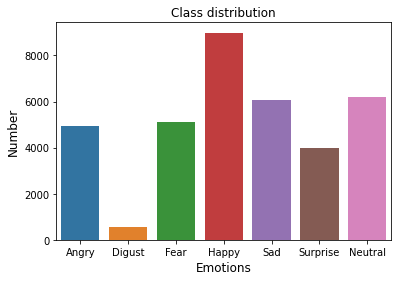

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.barplot(emotion_counts.emotion, emotion_counts.number)
plt.title('Class distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

In [ ]:
for index, row in df.iterrows():
  val = row['pixels'].split(" ")
  try:
    if 'Training' in row['Usage']:
      x_train.append(np.array(val, 'float32'))
      y_train.append(row['emotion'])
    elif 'PublicTest' in row['Usage']:
      x_test.append(np.array(val, 'float32'))
      y_test.append(row['emotion'])
  except:
    print(f"error occured at index :{index} and row:{row}")

In [ ]:
num_features = 64
num_labels = 7
batch_size = 16
epochs = 50
width, height = 48, 48

In [ ]:
x_train = np.array(x_train,'float32')
y_train = np.array(y_train,'float32')
x_test = np.array(x_test,'float32')
y_test = np.array(y_test,'float32')


In [ ]:
from keras.utils.np_utils import to_categorical



In [ ]:
y_train=to_categorical(y_train, num_classes=num_labels)
y_test=to_categorical(y_test, num_classes=num_labels)

In [ ]:
x_train -= np.mean(x_train, axis=0)
x_train /= np.std(x_train,axis=0)
x_test -= np.mean(x_test,axis=0)
x_test /= np.std(x_test, axis=0)

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)


In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import layers
from tensorflow import keras


In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(x_train.shape[1:])))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

#2nd convo layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

#3rd convo layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 64)         

In [ ]:
#compiling the model
model.compile(loss=categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])


In [ ]:
#training the model
history=model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose=1,
          validation_data = (x_test, y_test),
          shuffle=True)

Epoch 1/50
1795/1795 [==============================] - 14s 7ms/step - loss: 1.8252 - accuracy: 0.2423 - val_loss: 1.7981 - val_accuracy: 0.2494
Epoch 2/50
1795/1795 [==============================] - 13s 7ms/step - loss: 1.7701 - accuracy: 0.2655 - val_loss: 1.7321 - val_accuracy: 0.2948
Epoch 3/50
1795/1795 [==============================] - 13s 7ms/step - loss: 1.7005 - accuracy: 0.3136 - val_loss: 1.6384 - val_accuracy: 0.3452
Epoch 4/50
1795/1795 [==============================] - 13s 7ms/step - loss: 1.6367 - accuracy: 0.3538 - val_loss: 1.5739 - val_accuracy: 0.3789
Epoch 5/50
1795/1795 [==============================] - 13s 7ms/step - loss: 1.5878 - accuracy: 0.3791 - val_loss: 1.5598 - val_accuracy: 0.3826
Epoch 6/50
1795/1795 [==============================] - 13s 7ms/step - loss: 1.5323 - accuracy: 0.4031 - val_loss: 1.4855 - val_accuracy: 0.4113
Epoch 7/50
1795/1795 [==============================] - 13s 7ms/step - loss: 1.4822 - accuracy: 0.4241 - val_loss: 1.4553 - val_ac

In [ ]:
#accuracy
#loss_and_metrics = model.evaluate(x_train,y_train)
#print(loss_and_metrics)
from sklearn.metrics import accuracy_score
test_true = np.argmax(y_test, axis=1)
test_pred = np.argmax(model.predict(x_test), axis=1)
print("Model Accuracy: {:.4f}".format(accuracy_score(test_true, test_pred)))

Model Accuracy: 0.5901


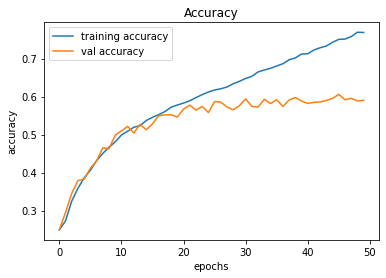

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

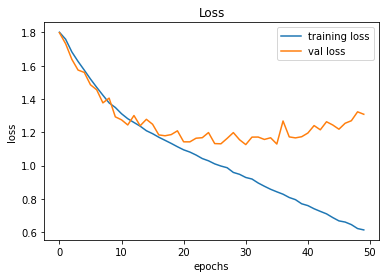

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


total wrong validation predictions: 1471


              precision    recall  f1-score   support

           0       0.51      0.49      0.50       467
           1       0.57      0.50      0.53        56
           2       0.48      0.35      0.41       496
           3       0.79      0.82      0.80       895
           4       0.51      0.40      0.45       653
           5       0.70      0.78      0.74       415
           6       0.45      0.62      0.52       607

    accuracy                           0.59      3589
   macro avg       0.57      0.56      0.56      3589
weighted avg       0.59      0.59      0.58      3589



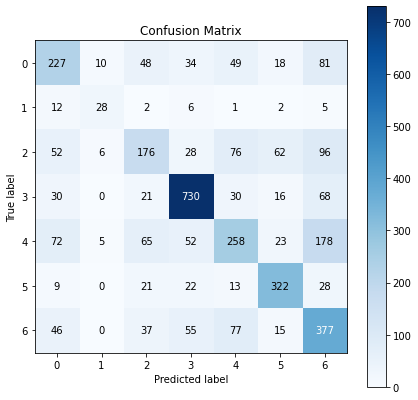

In [ ]:
! pip install -q scikit-plot
import scikitplot as skplt
from sklearn.metrics import classification_report
yhat_valid = model.predict_classes(x_test)
skplt.metrics.plot_confusion_matrix(np.argmax(y_test, axis=1), yhat_valid, figsize=(7,7))
#pyplot.savefig("confusion_matrix_dcnn.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_test, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(y_test, axis=1), yhat_valid))


In [ ]:
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
  json_file.write(fer_json)
model.save_weights("fer.h5")

In [ ]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

In [ ]:
model = model_from_json(open("fer.json", "r").read())
model.load_weights('fer.h5')
face_haar_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

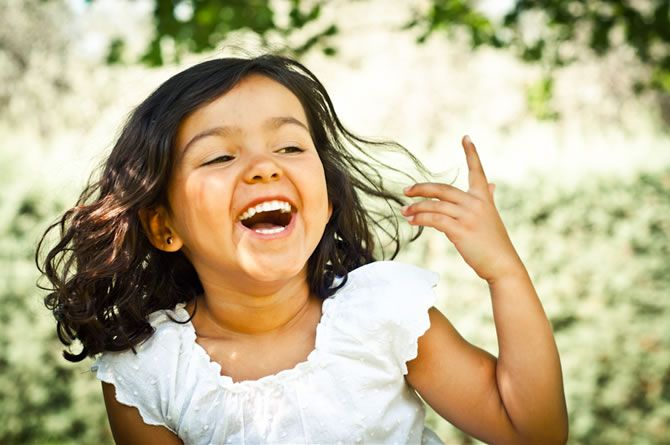

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
test_image = cv2.imread('/content/pic1.jpg')
cv2_imshow(test_image)

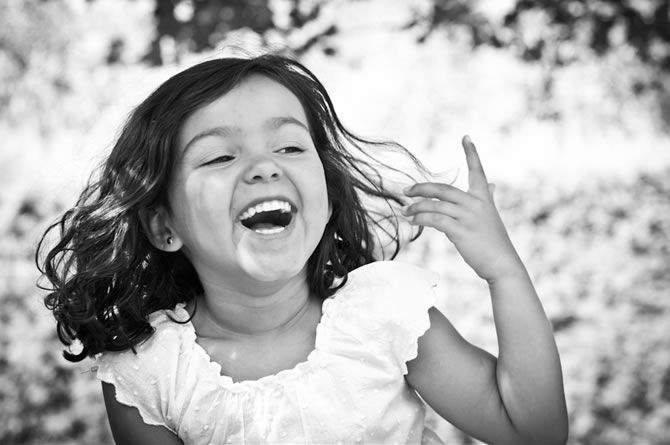

In [ ]:
gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

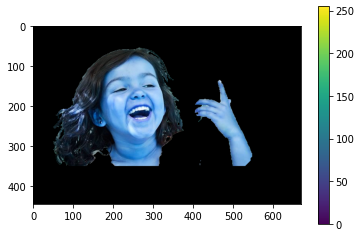

(<matplotlib.image.AxesImage at 0x7f975a0982d0>,
 None)

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('pic1.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,500,300)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

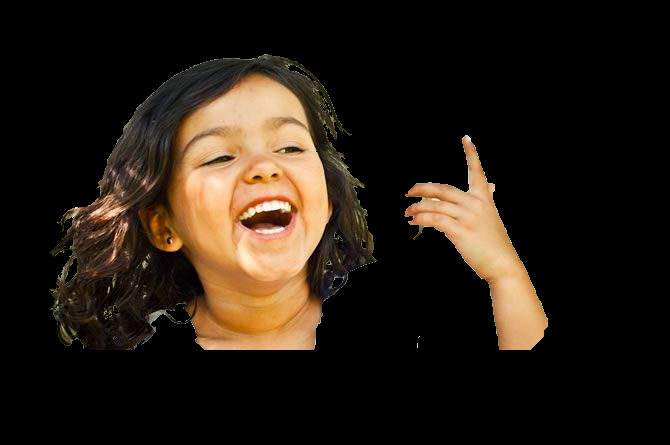

In [ ]:
import cv2
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
from keras.preprocessing.image import img_to_array
cv2_imshow(img)

happy


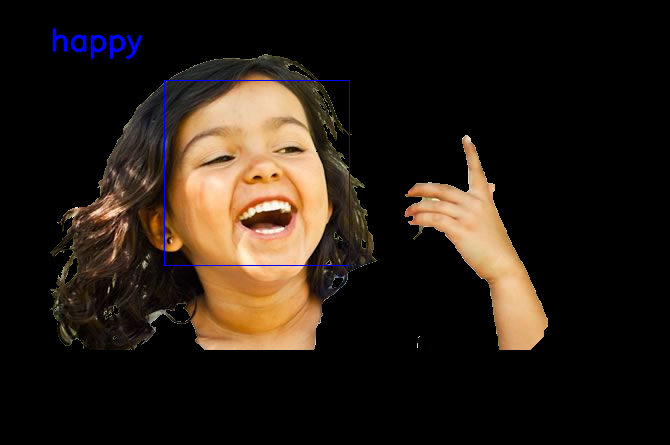

In [ ]:
import cv2
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray_image, 1.1, 4)
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y), (x+w,y+h), (255,0,0))
  roi_gray =  gray_image[y:y+w, x:x+h]
  roi_gray = cv2.resize(roi_gray,(48,48))
  image_pixels = img_to_array(roi_gray)
  image_pixels = np.expand_dims(image_pixels, axis = 0)
  image_pixels /= 255
  predictions = model.predict(image_pixels)
  max_index = np.argmax(predictions[0])
  emotion_detection = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
  emotion_prediction = emotion_detection[max_index]
  print(emotion_prediction)
  font = cv2.FONT_HERSHEY_SIMPLEX
  org = (50, 50)
  fontScale = 1
  color = (255, 0, 0)
  thickness = 2
  image = cv2.putText(img, emotion_prediction, org, font, fontScale, color, thickness, cv2.LINE_AA)
  cv2_imshow(img)